## Thresholding

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import dtale
import numpy as np

In [43]:
dataset_raw = pd.read_csv('aggregated_dataset.tsv',sep=';')

/Users/askemeineche/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning:

Columns (17,18) have mixed types.Specify dtype option on import or set low_memory=False.



In [49]:
dataset = dataset_raw[['date','High','Low','Mean','event_id','event_type','period_type']].drop_duplicates()

,date,High,Low,Mean,event_id,event_type,period_type
0,2022-03-06,39640.176751,38211.647962,38925.912357,1.0,positive,before
130,2022-03-07,39430.228059,37260.201714,38345.214886,1.0,positive,before
330,2022-03-08,39304.442853,37957.386527,38630.914690,1.0,positive,before
725,2022-03-09,42465.672911,38706.094780,40585.883846,1.0,positive,before
1118,2022-03-10,42004.727152,38832.941265,40418.834208,1.0,positive,before
...,...,...,...,...,...,...,...
76024,2022-09-13,22673.819766,20062.670699,21368.245233,NaN,NaN,NaN
76185,2022-09-14,20467.201433,19793.396718,20130.299075,NaN,NaN,NaN
76520,2022-09-16,19870.629766,19400.075449,19635.352608,NaN,NaN,NaN
76627,2022-09-17,20162.532022,19777.034028,19969.783025,NaN,NaN,NaN


In [6]:
dataset_onehot = dataset_raw.copy()
dataset_onehot.head()

,date,corpus,text_type,conflict,similarity,knowledge,power,status,support,identity,romance,trust,fun,High,Low,Mean,event_id,event_type,period_type
0,2022-03-06,sarn sauron coin bsc gem of 2022 launch now e...,post,0.217982,0.008616,0.987545,0.095460,0.210643,0.012049,0.401652,0.004092,8.436824e-07,0.404854,39640.176751,38211.647962,38925.912357,1.0,positive,before
1,2022-03-06,a proposal to you removed,post,0.503045,0.435572,0.485023,0.518171,0.427520,0.495435,0.432057,0.254124,3.306695e-01,0.453298,39640.176751,38211.647962,38925.912357,1.0,positive,before
2,2022-03-06,time to buy nan,post,0.315845,0.453668,0.491014,0.467255,0.453663,0.485220,0.443327,0.571401,4.674791e-01,0.595824,39640.176751,38211.647962,38925.912357,1.0,positive,before
3,2022-03-06,stupid question please excuse my ignorance can...,post,0.685344,0.003814,0.995469,0.033478,0.095750,0.000713,0.207318,0.000114,8.855732e-07,0.099581,39640.176751,38211.647962,38925.912357,1.0,positive,before
4,2022-03-06,bitcoin nan,post,0.488357,0.469591,0.483014,0.434496,0.515467,0.484323,0.482162,0.507920,5.038089e-01,0.523179,39640.176751,38211.647962,38925.912357,1.0,positive,before


In [28]:
dims = ['conflict','similarity','knowledge','power','status','support','identity','romance','trust','fun']
threshold = 0.8
for dim in dims:
    dataset_onehot[dim] = dataset_onehot[dim].apply(lambda x:1  if x>threshold else 0)

In [29]:
cols = ['date']+dims
aggregated_oh = dataset_onehot[cols].groupby('date').mean().sort_values('date')
aggregated_oh

,conflict,similarity,knowledge,power,status,support,identity,romance,trust,fun
date,,,,,,,,,,
2022-01-02,0.235955,0.168539,0.848315,0.179775,0.095506,0.146067,0.028090,0.039326,0.247191,0.325843
2022-01-03,0.352500,0.177500,0.810000,0.317500,0.117500,0.112500,0.040000,0.120000,0.190000,0.425000
2022-01-04,0.372500,0.172500,0.792500,0.300000,0.070000,0.130000,0.032500,0.127500,0.212500,0.417500
2022-01-05,0.317500,0.185000,0.762500,0.277500,0.125000,0.155000,0.035000,0.082500,0.240000,0.390000
2022-01-06,0.352500,0.212500,0.770000,0.205000,0.135000,0.125000,0.067500,0.050000,0.227500,0.420000
...,...,...,...,...,...,...,...,...,...,...
2022-09-13,0.273292,0.099379,0.832298,0.242236,0.105590,0.111801,0.080745,0.049689,0.316770,0.285714
2022-09-14,0.414925,0.179104,0.746269,0.253731,0.089552,0.104478,0.077612,0.074627,0.200000,0.349254
2022-09-16,0.289720,0.084112,0.841121,0.214953,0.102804,0.084112,0.046729,0.037383,0.177570,0.271028


In [30]:
roll = aggregated_oh.rolling(7).mean().dropna()
roll.head()

,conflict,similarity,knowledge,power,status,support,identity,romance,trust,fun
date,,,,,,,,,,
2022-01-08,0.340494,0.194434,0.784402,0.261039,0.104001,0.128367,0.043299,0.082404,0.223884,0.409763
2022-01-09,0.365714,0.193214,0.777143,0.275000,0.102500,0.118929,0.048214,0.096786,0.215714,0.427500
2022-01-10,0.371429,0.198214,0.773929,0.270000,0.098214,0.118571,0.052500,0.091786,0.219286,0.425000
2022-01-11,0.369286,0.202143,0.772500,0.268214,0.102143,0.120357,0.056429,0.079643,0.221071,0.419643
2022-01-12,0.371429,0.197143,0.777857,0.266786,0.100000,0.113929,0.057857,0.080000,0.220357,0.423214


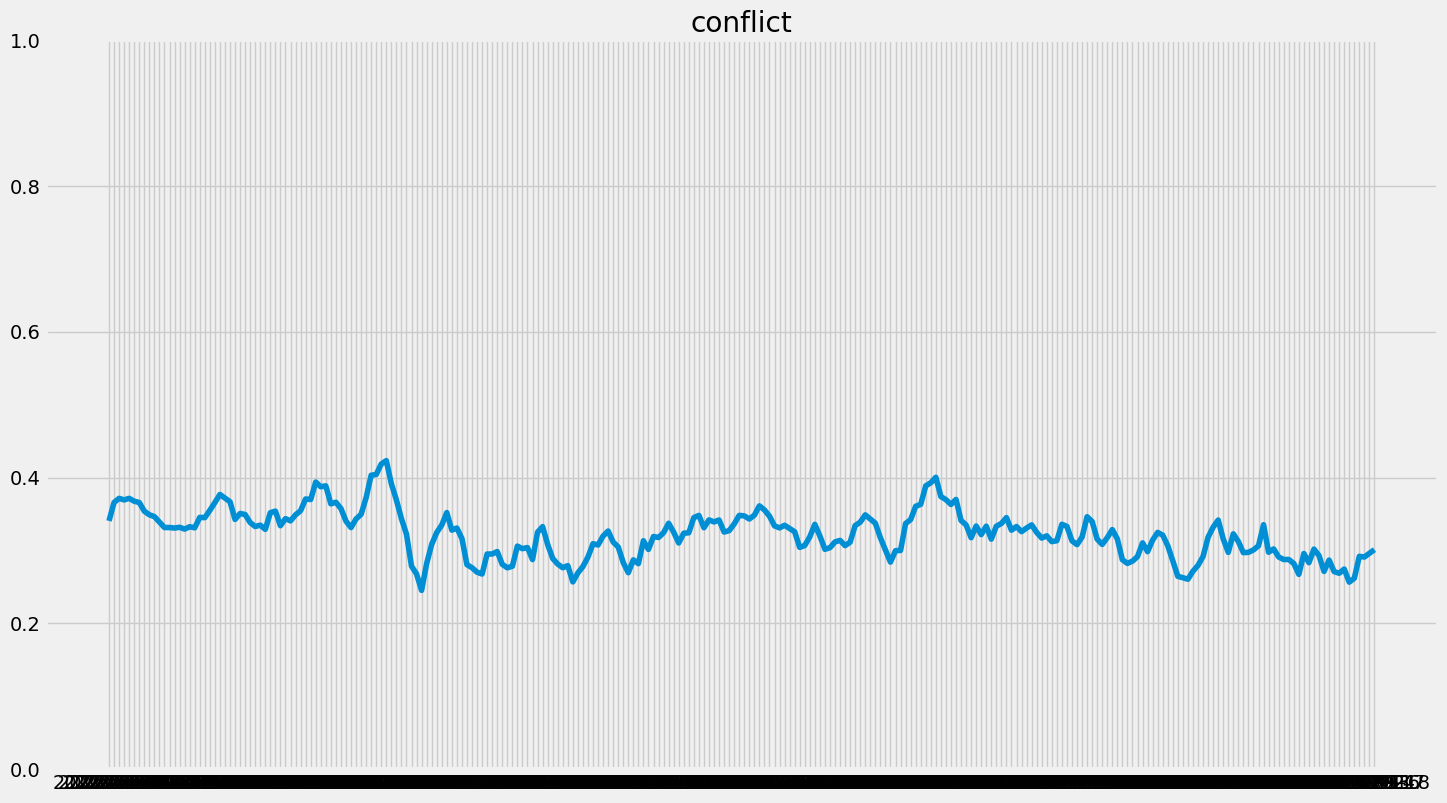

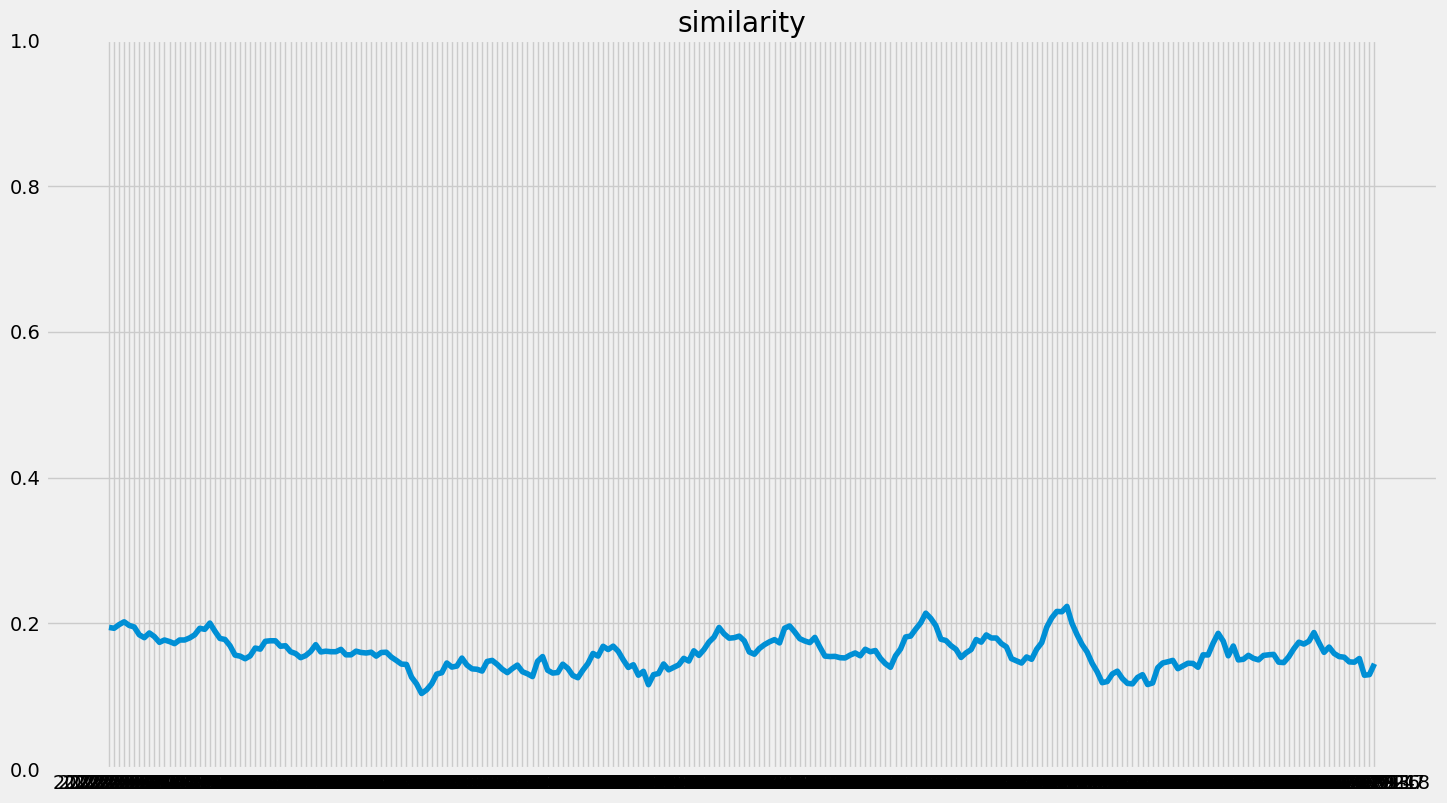

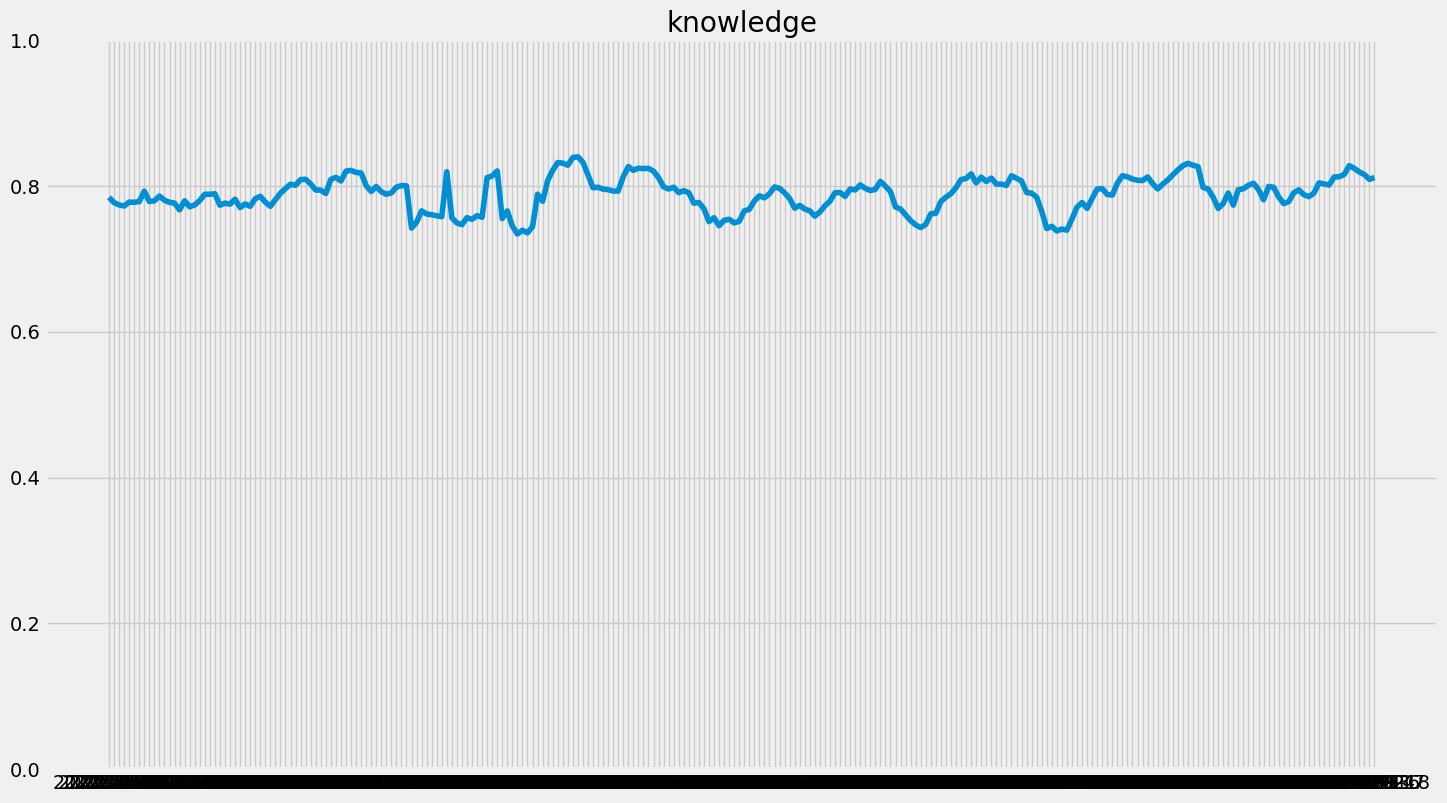

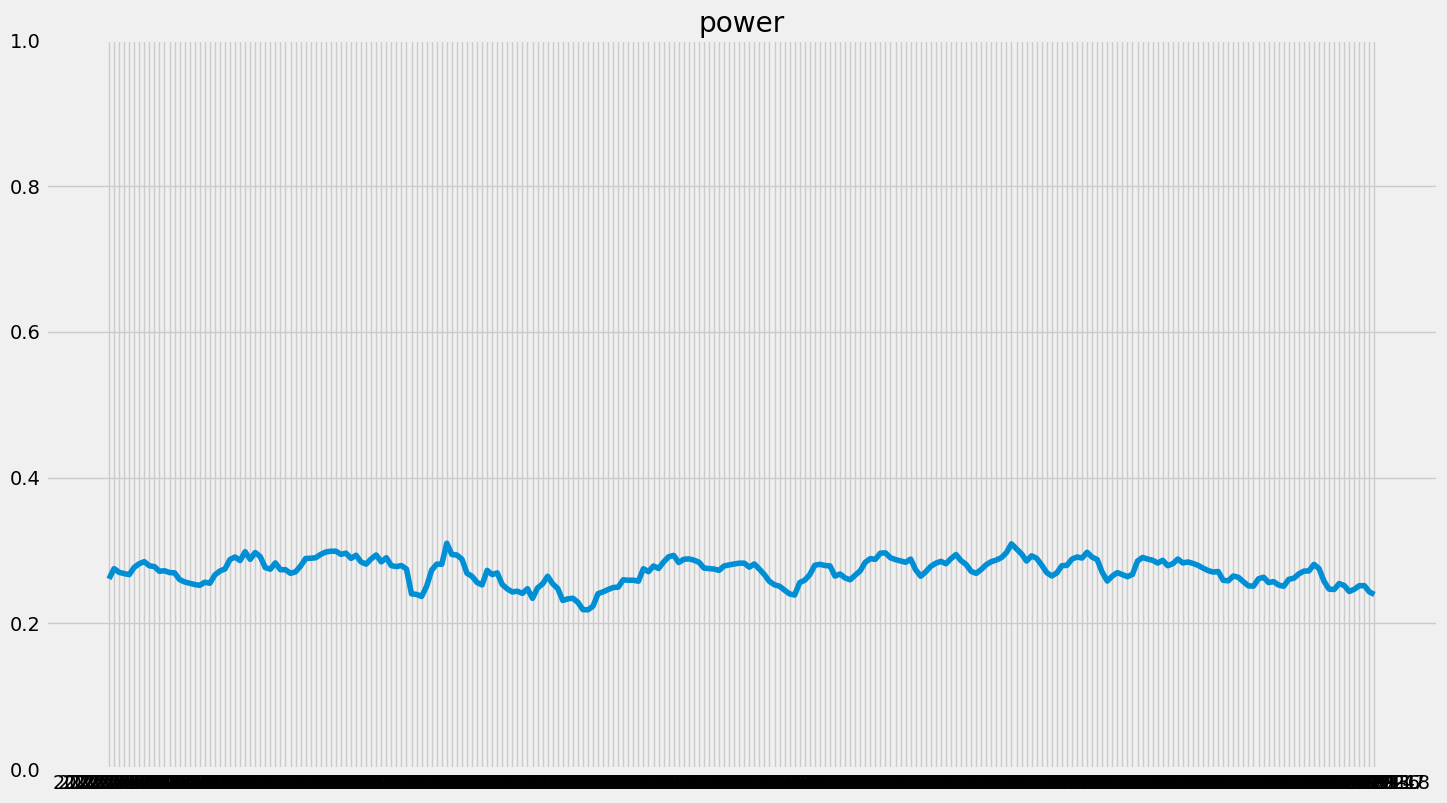

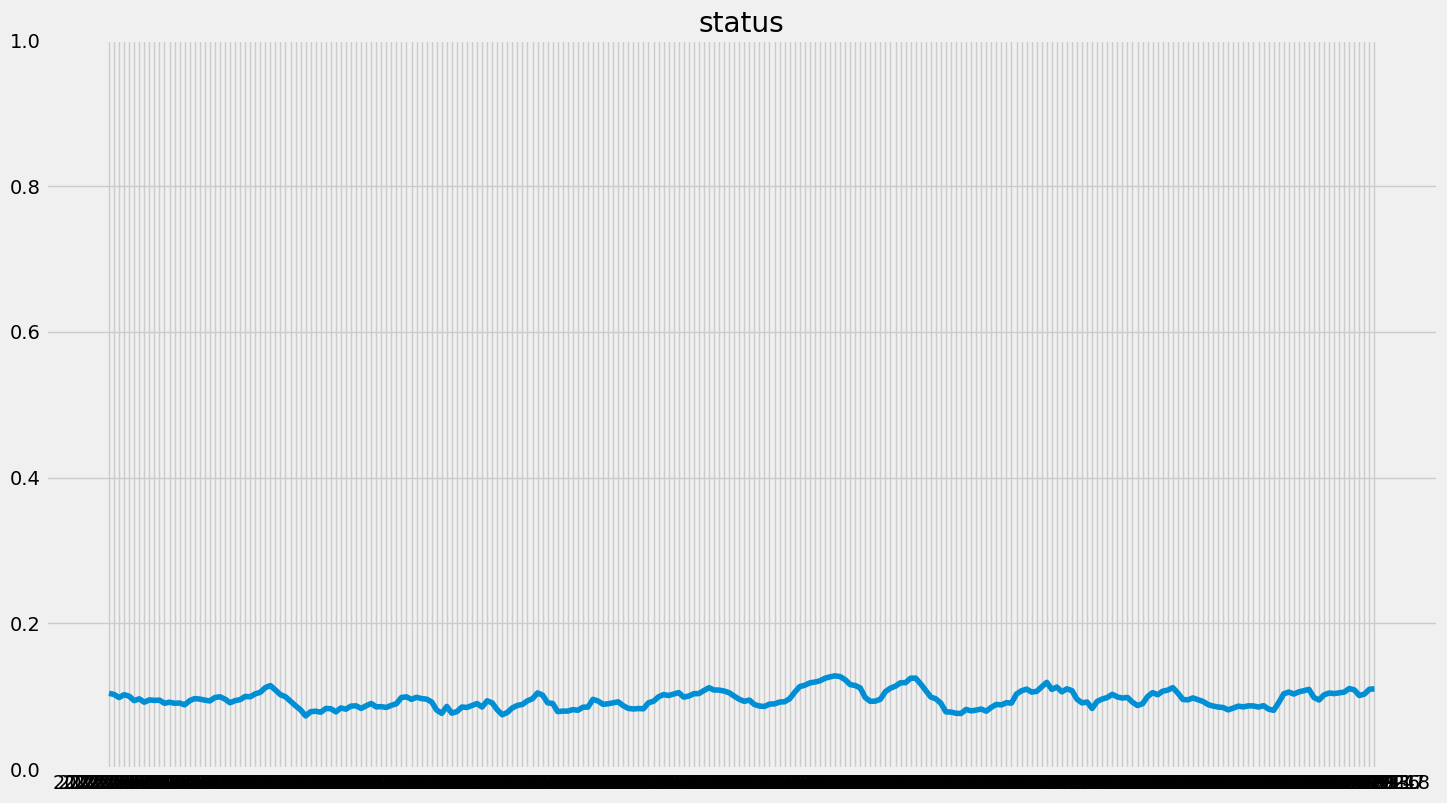

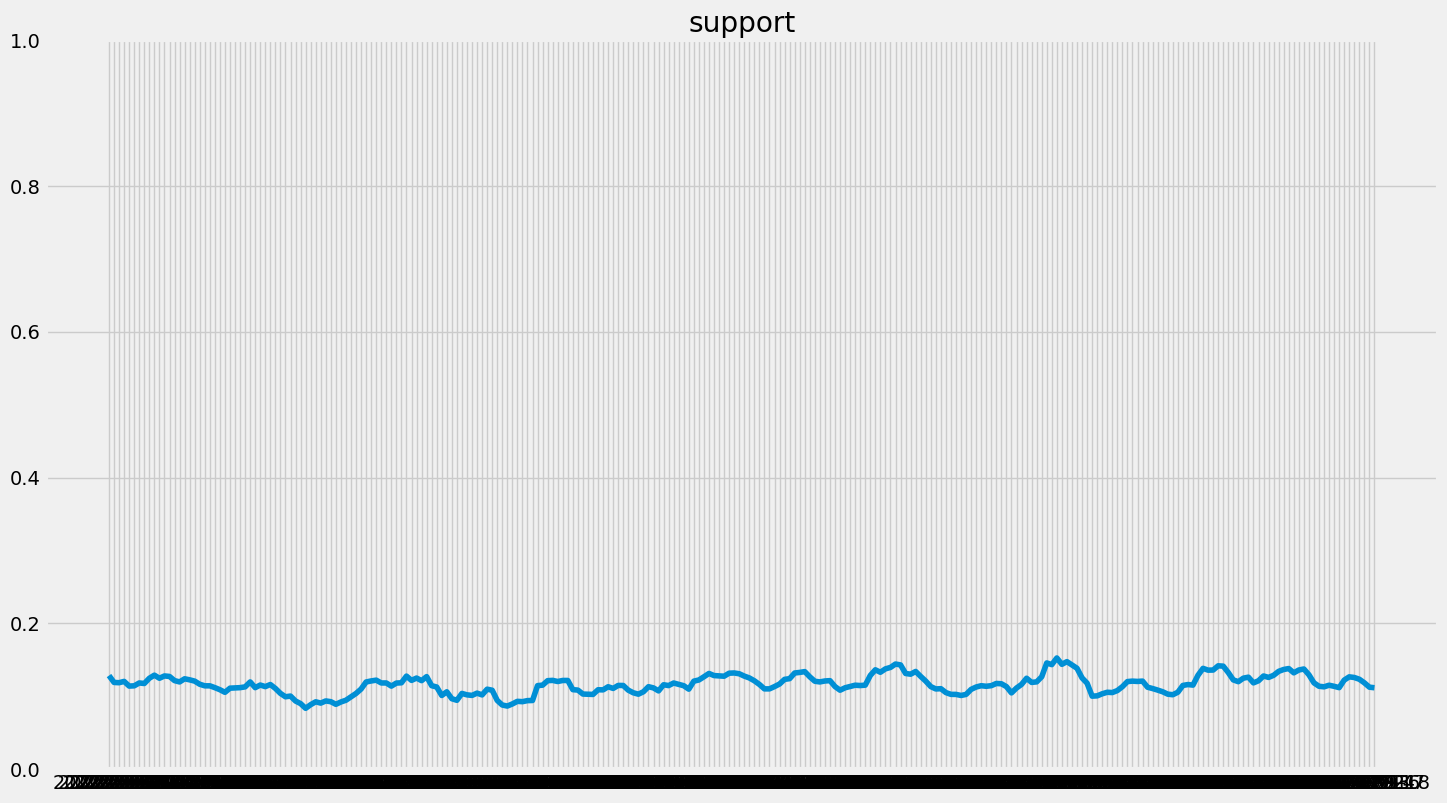

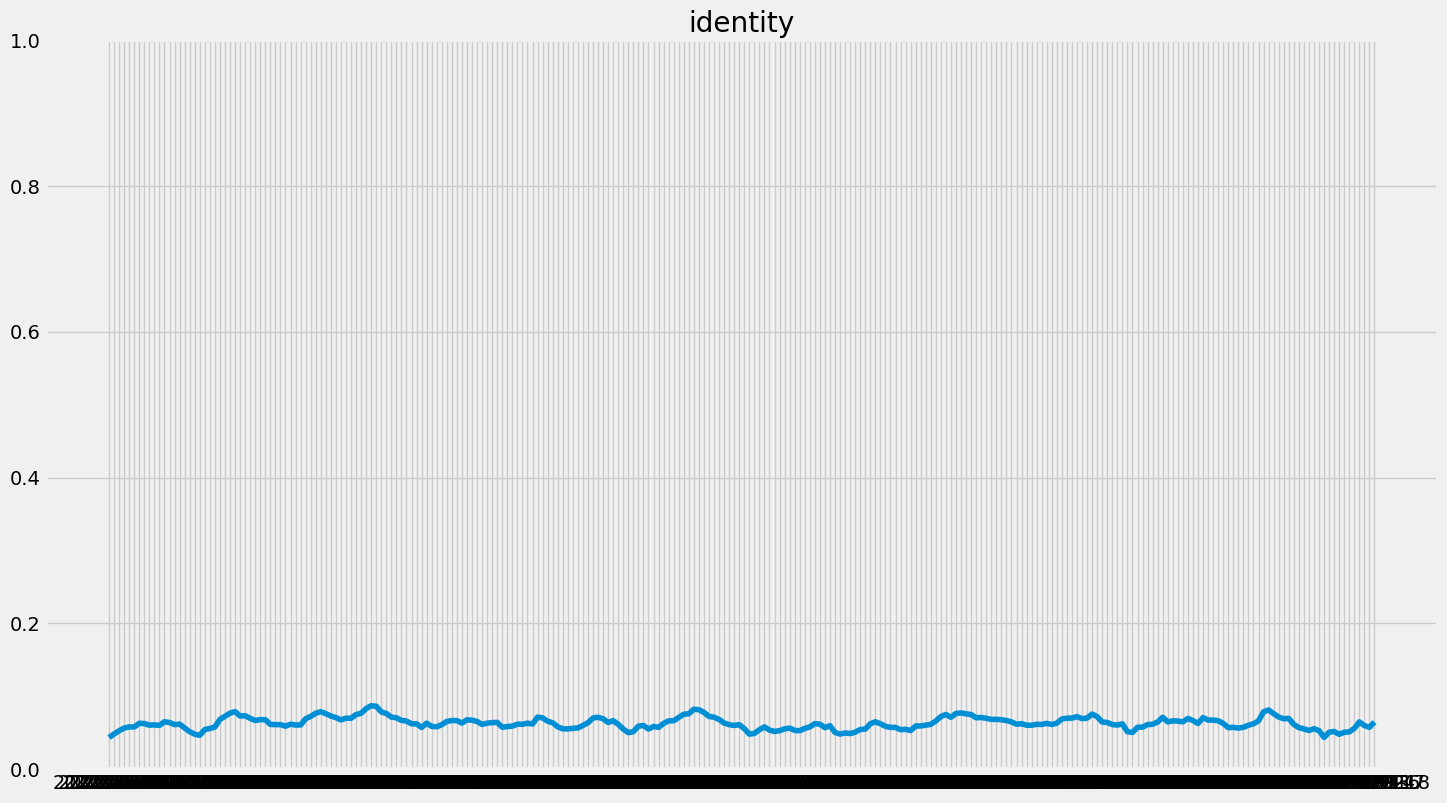

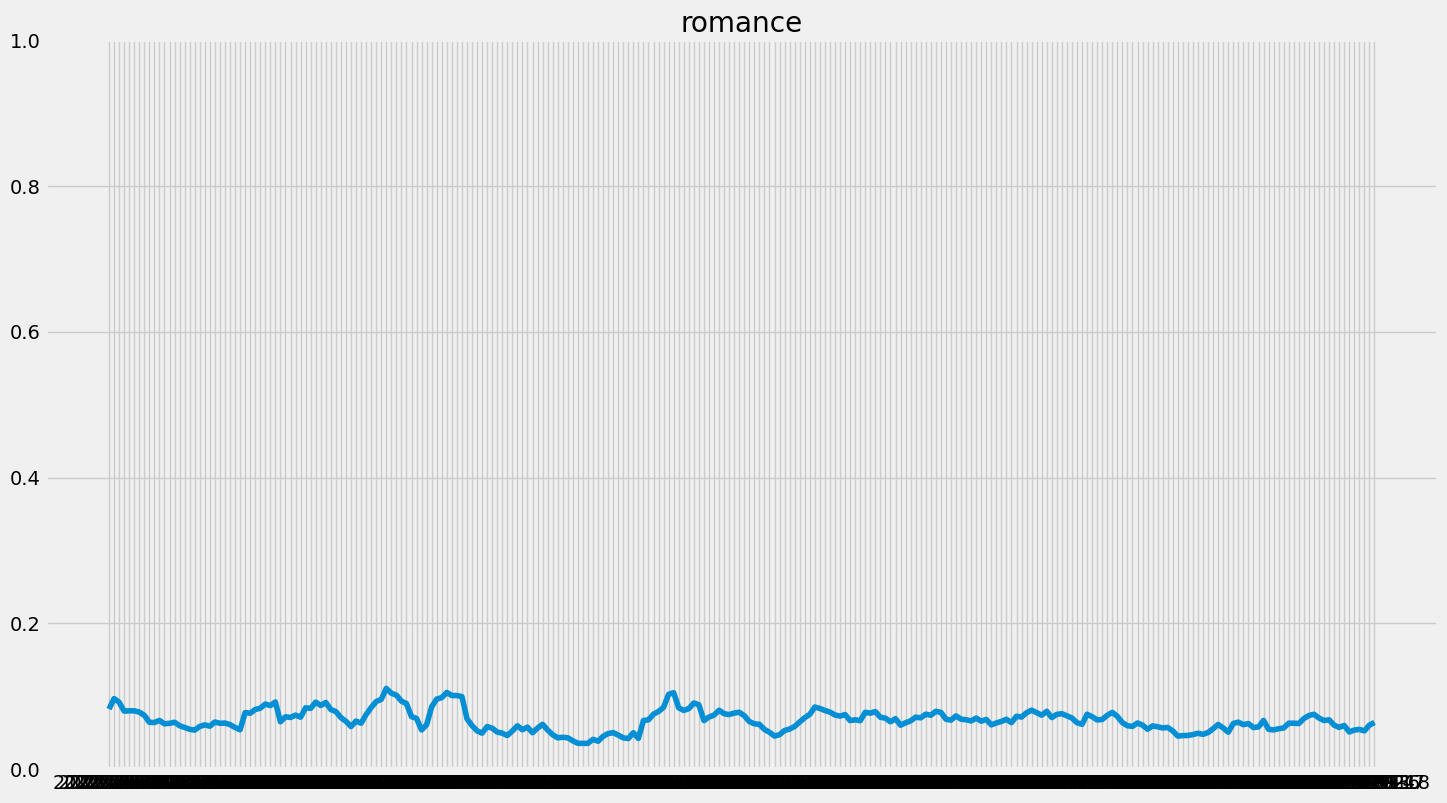

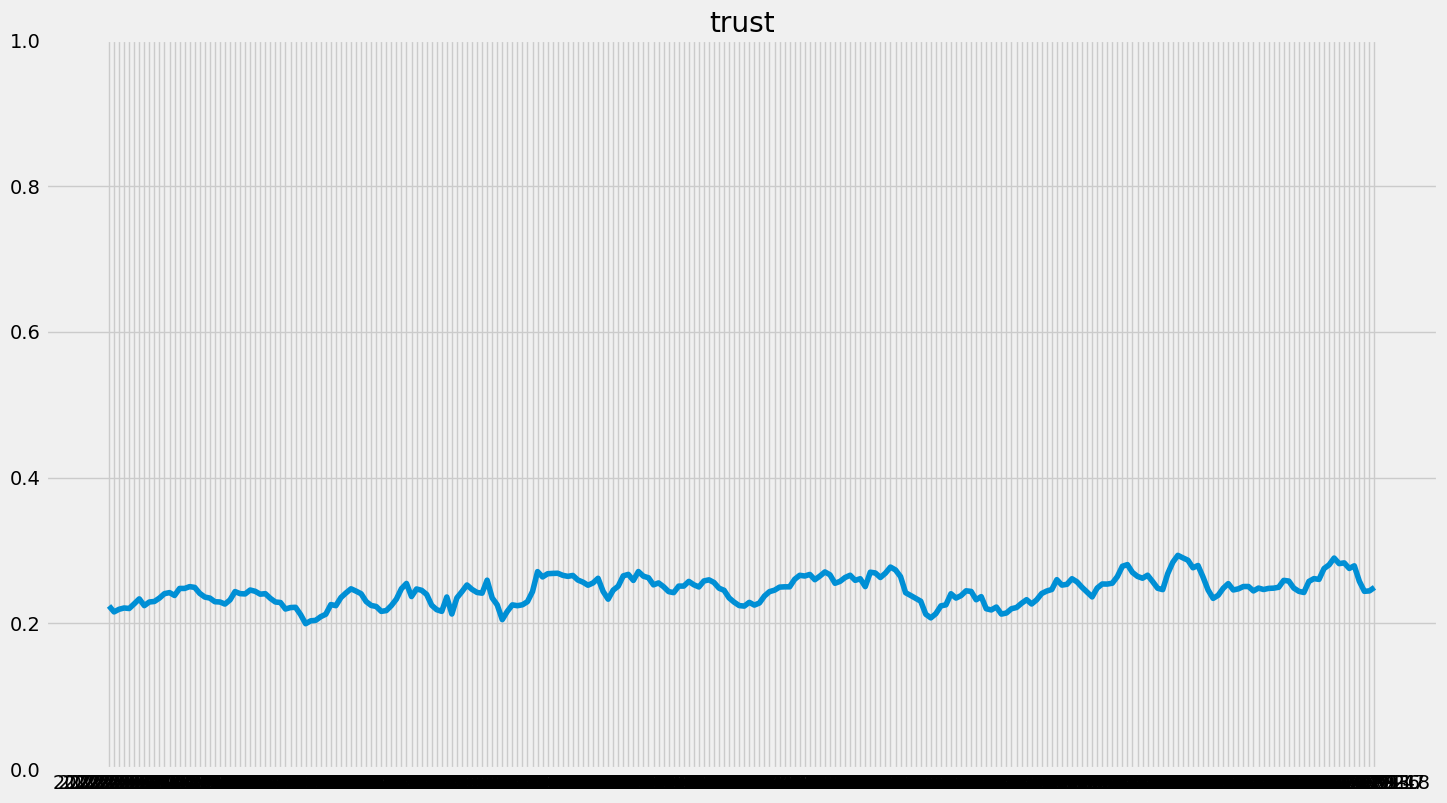

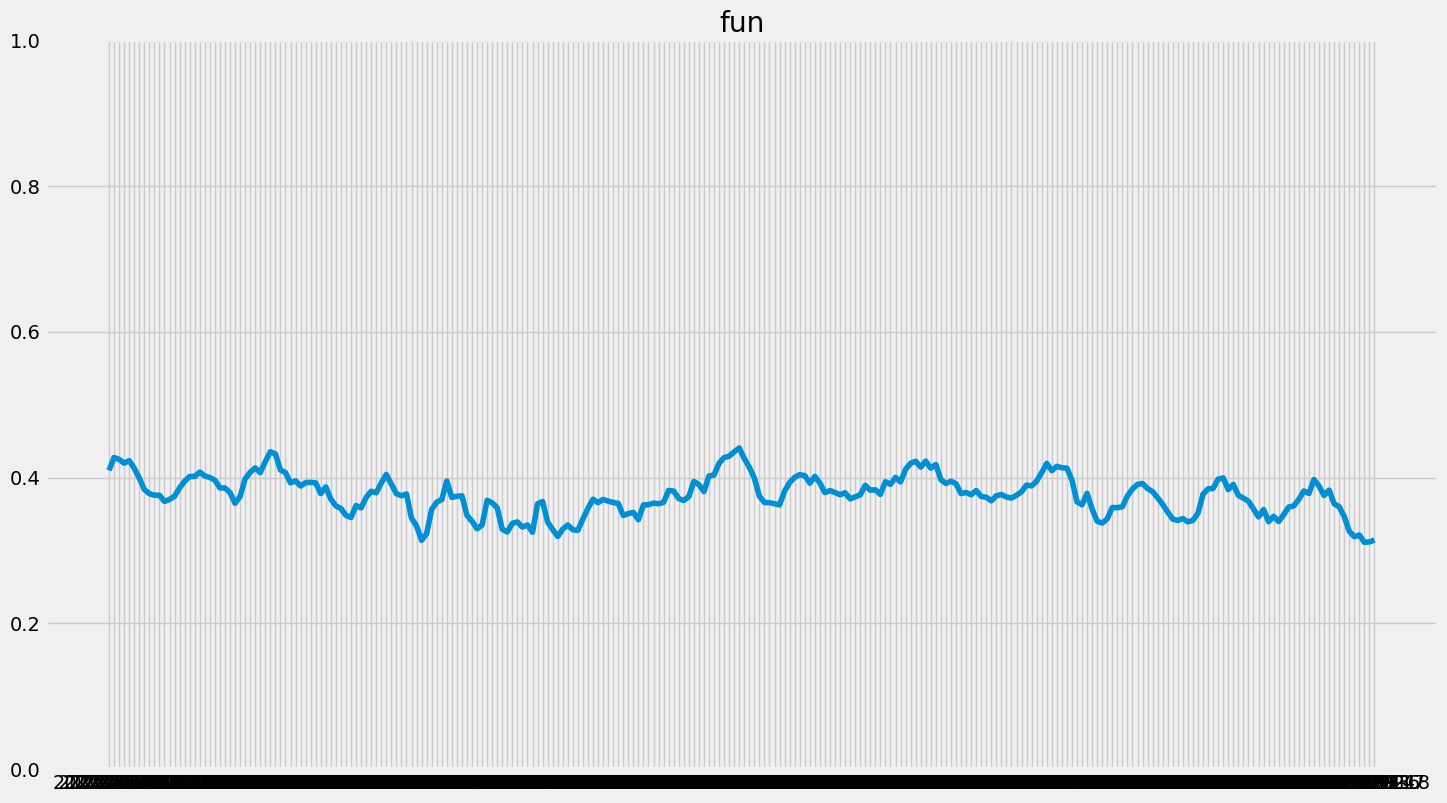

In [32]:
for dim in dims:
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=[16,9])
    plt.title(dim)
    plt.ylim([0,1])
    plt.plot(roll.index,
             roll[dim])


    plt.show()

In [40]:
df_ = pd.merge(roll.reset_index(),dataset[['date','High','Low','Mean']].groupby('date').mean().reset_index(),left_on='date',right_on='date')
df_

,date,conflict,similarity,knowledge,power,status,support,identity,romance,trust,fun,High,Low,Mean
0,2022-01-08,0.340494,0.194434,0.784402,0.261039,0.104001,0.128367,0.043299,0.082404,0.223884,0.409763,42228.942035,40672.275448,41450.608742
1,2022-01-09,0.365714,0.193214,0.777143,0.275000,0.102500,0.118929,0.048214,0.096786,0.215714,0.427500,42663.950482,41338.159706,42001.055094
2,2022-01-10,0.371429,0.198214,0.773929,0.270000,0.098214,0.118571,0.052500,0.091786,0.219286,0.425000,42199.485042,39796.571708,40998.028375
3,2022-01-11,0.369286,0.202143,0.772500,0.268214,0.102143,0.120357,0.056429,0.079643,0.221071,0.419643,43001.157121,41407.753873,42204.455497
4,2022-01-12,0.371429,0.197143,0.777857,0.266786,0.100000,0.113929,0.057857,0.080000,0.220357,0.423214,44135.368509,42528.986445,43332.177477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2022-09-13,0.261832,0.146703,0.824085,0.246801,0.108736,0.125702,0.055861,0.053602,0.278939,0.318842,22673.819766,20062.670699,21368.245233
248,2022-09-14,0.291887,0.151727,0.819222,0.251663,0.100966,0.123312,0.064784,0.054523,0.257727,0.321117,20467.201433,19793.396718,20130.299075
249,2022-09-16,0.290947,0.128822,0.815573,0.251682,0.102954,0.118396,0.059819,0.052456,0.243940,0.311158,19870.629766,19400.075449,19635.352608
250,2022-09-17,0.296104,0.129649,0.809032,0.243032,0.109588,0.112422,0.057329,0.060400,0.244470,0.311650,20162.532022,19777.034028,19969.783025


In [42]:
dtale.show(df_)

## Only for Events

In [84]:
dataset['event_type'].unique()

array(['positive', 'negative', nan], dtype=object)

In [90]:
corr_dfs = {}
for et in dataset['event_type'].unique():
    for pt in dataset['period_type'].unique():
        if isinstance(et,float) or isinstance(pt,float):
            continue
        
        dataset_onehot = dataset_raw.loc[(dataset_raw['event_type']==et)&
                                            (dataset_raw['period_type']==pt)]
        dims = ['conflict','similarity','knowledge','power','status','support','identity','romance','trust','fun']
        threshold = 0.6
        for dim in dims:
            dataset_onehot[dim] = dataset_onehot[dim].apply(lambda x:1  if x>threshold else 0)


        cols = ['date']+dims
        aggregated_oh = dataset_onehot[cols].groupby('date').mean().sort_index()
        roll = aggregated_oh.rolling(7).mean().dropna()
        df_ = pd.merge(roll.reset_index(),dataset_onehot[['date','Mean']].groupby('date').mean().reset_index(),left_on='date',right_on='date').sort_values('date')
        if pt+'_'+et not in corr_dfs:
            corr_dfs[pt+'_'+et] = df_
        else:
            corr_dfs[pt+'_'+et] = pd.concat([corr_dfs[pt+'_'+et],df_])
            


/var/folders/b4/cwqn8hyj67100247892j531w0000gn/T/ipykernel_4494/753330681.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
corr_dfs.keys()

dict_keys(['before_positive', 'during_positive', 'after_positive', 'before_negative', 'during_negative', 'after_negative'])

In [101]:
for k,v in _df_.corr().iterrows():
    print(k,v['Mean'])

conflict -0.3887397468116795
similarity -0.5105680825847287
knowledge -0.4343033800849128
power -0.6732708664977428
status -0.42531794662109057
support 0.62304039968317
identity -0.0014506828509974537
romance -0.7176138344207955
trust -0.563837547495355
fun -0.7652075456695029
Mean 1.0


In [102]:
hm_dict = {}

for k,_df_ in corr_dfs.items():
    for i,v in _df_.corr().iterrows():
        print(k,v['Mean'])
        hm_dict[k+'_'+i] = v
hm_df = pd.DataFrame(hm_dict)
hm_df

before_positive -0.3887397468116795
before_positive -0.5105680825847287
before_positive -0.4343033800849128
before_positive -0.6732708664977428
before_positive -0.42531794662109057
before_positive 0.62304039968317
before_positive -0.0014506828509974537
before_positive -0.7176138344207955
before_positive -0.563837547495355
before_positive -0.7652075456695029
before_positive 1.0
during_positive -0.4440369553641083
during_positive -0.6471621126358568
during_positive 0.5129541215503329
during_positive 0.4056118739260676
during_positive -0.44117839565607647
during_positive -0.3591821560631183
during_positive -0.08496757436161378
during_positive -0.757763004191168
during_positive -0.31344847162830625
during_positive -0.4341617980970794
during_positive 1.0
after_positive -0.4725495127216627
after_positive -0.4902839048024424
after_positive 0.048089670718212976
after_positive -0.26481367658643656
after_positive 0.3459033921184513
after_positive 0.4291491479073584
after_positive -0.391335803074

,before_positive_conflict,before_positive_similarity,before_positive_knowledge,before_positive_power,before_positive_status,before_positive_support,before_positive_identity,before_positive_romance,before_positive_trust,before_positive_fun,...,after_negative_similarity,after_negative_knowledge,after_negative_power,after_negative_status,after_negative_support,after_negative_identity,after_negative_romance,after_negative_trust,after_negative_fun,after_negative_Mean
conflict,1.000000,0.805396,0.774151,0.638278,-0.148230,-0.629042,-0.690130,0.441727,0.805643,0.800918,...,0.083999,-0.574819,-0.172411,0.271264,-0.560965,0.730729,-0.460326,-0.216014,0.355705,0.587337
similarity,0.805396,1.000000,0.836101,0.898458,0.072133,-0.897277,-0.380100,0.776038,0.849747,0.884582,...,1.000000,0.319579,-0.530985,0.324778,0.553708,0.006660,0.389778,0.483407,0.507656,-0.226434
knowledge,0.774151,0.836101,1.000000,0.811797,-0.197654,-0.650365,-0.524987,0.610163,0.922396,0.731208,...,0.319579,1.000000,0.164175,-0.096434,0.592415,-0.590208,0.735107,0.504057,-0.193231,-0.618822
power,0.638278,0.898458,0.811797,1.000000,0.248590,-0.925386,-0.227972,0.919743,0.872976,0.871805,...,-0.530985,0.164175,1.000000,0.183345,-0.116560,-0.083919,-0.145946,0.054824,-0.723696,-0.042641
status,-0.148230,0.072133,-0.197654,0.248590,1.000000,-0.314232,0.171350,0.490895,0.101757,0.324233,...,0.324778,-0.096434,0.183345,1.000000,0.254706,0.429956,-0.327116,0.490633,-0.222633,0.041640
support,-0.629042,-0.897277,-0.650365,-0.925386,-0.314232,1.000000,0.163212,-0.901951,-0.743750,-0.882859,...,0.553708,0.592415,-0.116560,0.254706,1.000000,-0.350181,0.538319,0.609294,-0.232679,-0.779327
identity,-0.690130,-0.380100,-0.524987,-0.227972,0.171350,0.163212,1.000000,-0.072254,-0.587303,-0.390260,...,0.006660,-0.590208,-0.083919,0.429956,-0.350181,1.000000,-0.636965,-0.041384,0.049194,0.451027
romance,0.441727,0.776038,0.610163,0.919743,0.490895,-0.901951,-0.072254,1.000000,0.743464,0.836267,...,0.389778,0.735107,-0.145946,-0.327116,0.538319,-0.636965,1.000000,0.138698,0.084258,-0.629317
trust,0.805643,0.849747,0.922396,0.872976,0.101757,-0.743750,-0.587303,0.743464,1.000000,0.865750,...,0.483407,0.504057,0.054824,0.490633,0.609294,-0.041384,0.138698,1.000000,-0.132453,-0.231645
fun,0.800918,0.884582,0.731208,0.871805,0.324233,-0.882859,-0.390260,0.836267,0.865750,1.000000,...,0.507656,-0.193231,-0.723696,-0.222633,-0.232679,0.049194,0.084258,-0.132453,1.000000,0.446594


In [103]:
dtale.show(hm_df)

2022-12-01 09:49:19,174 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-12-01 09:49:19,180 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


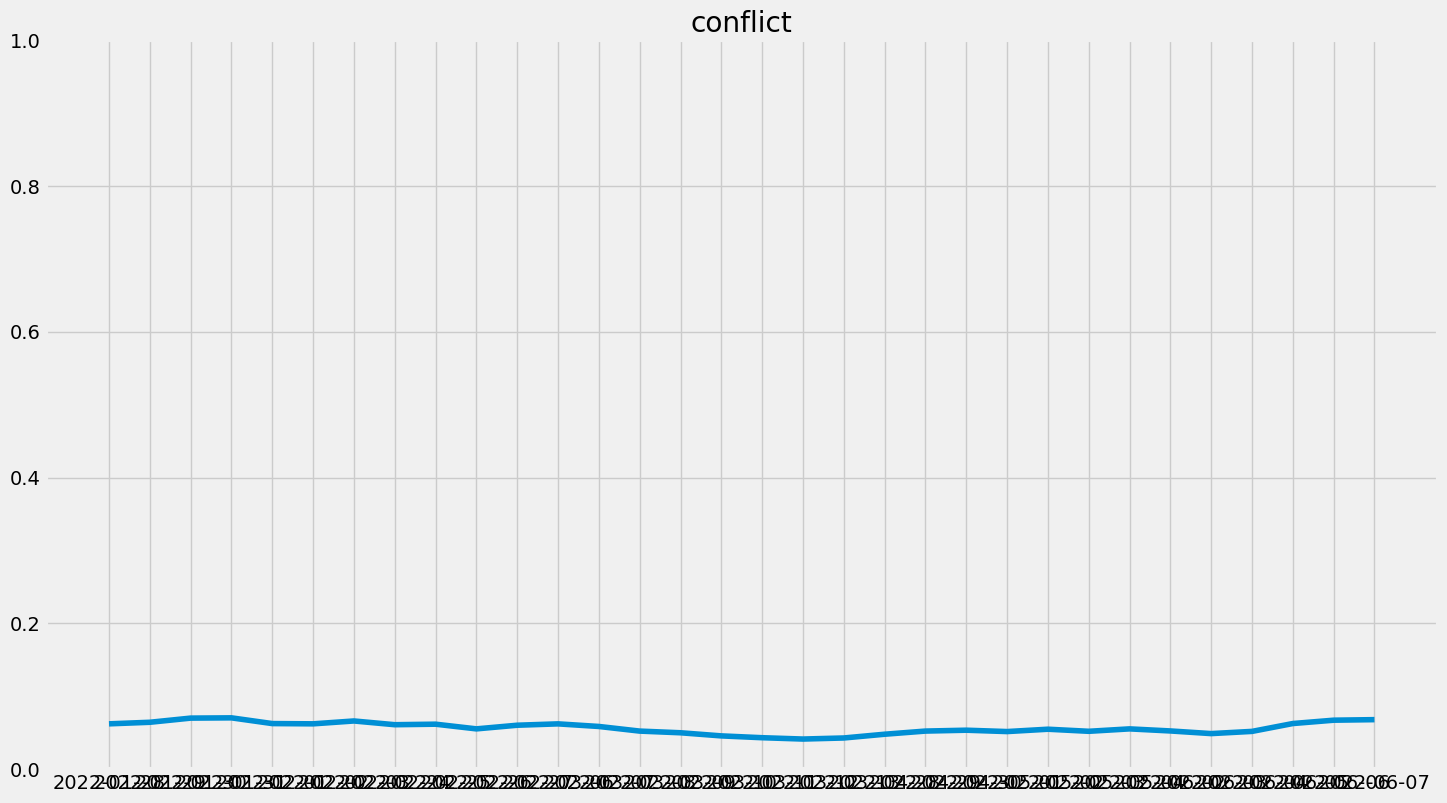

2022-12-01 09:49:19,534 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-12-01 09:49:19,540 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


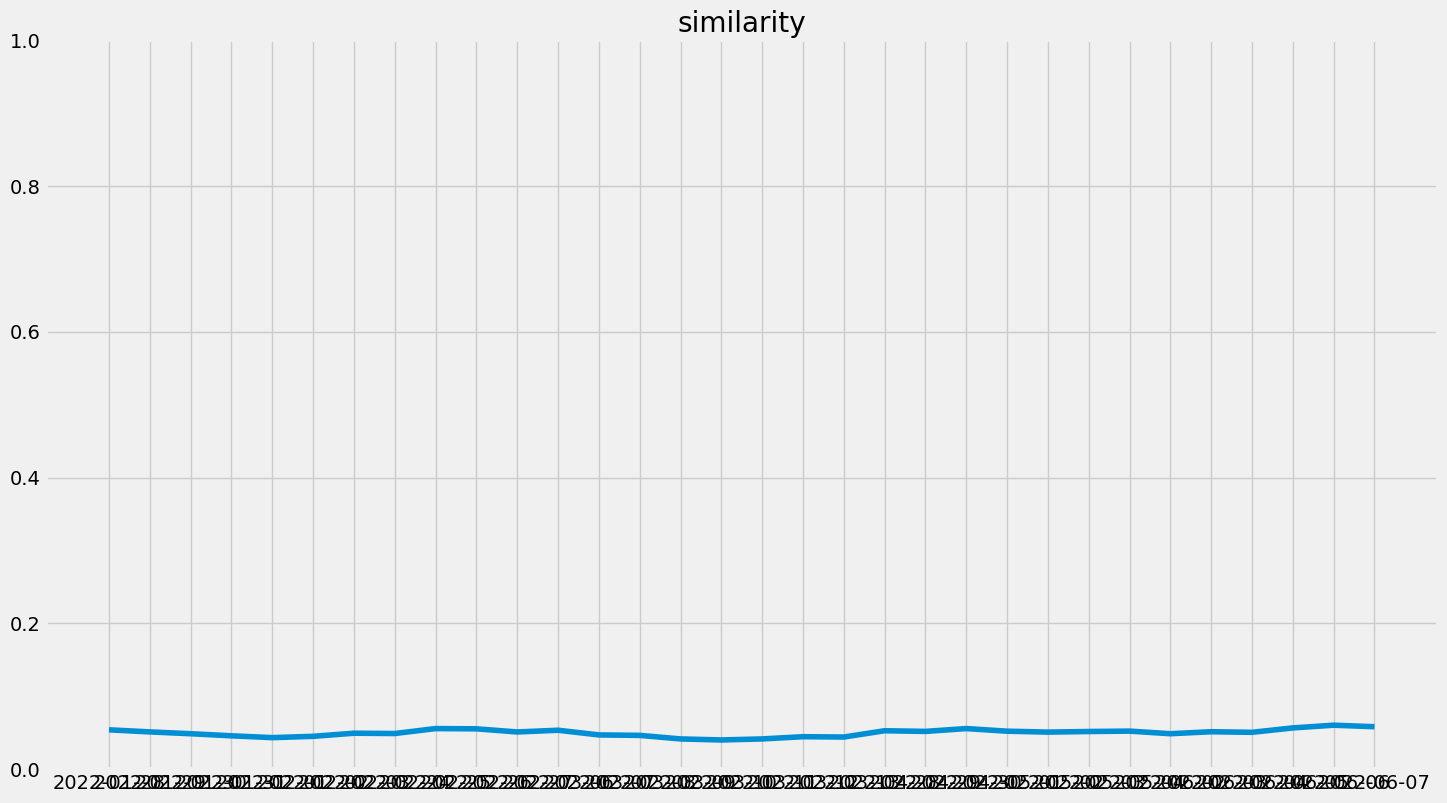

2022-12-01 09:49:20,421 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-12-01 09:49:20,432 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


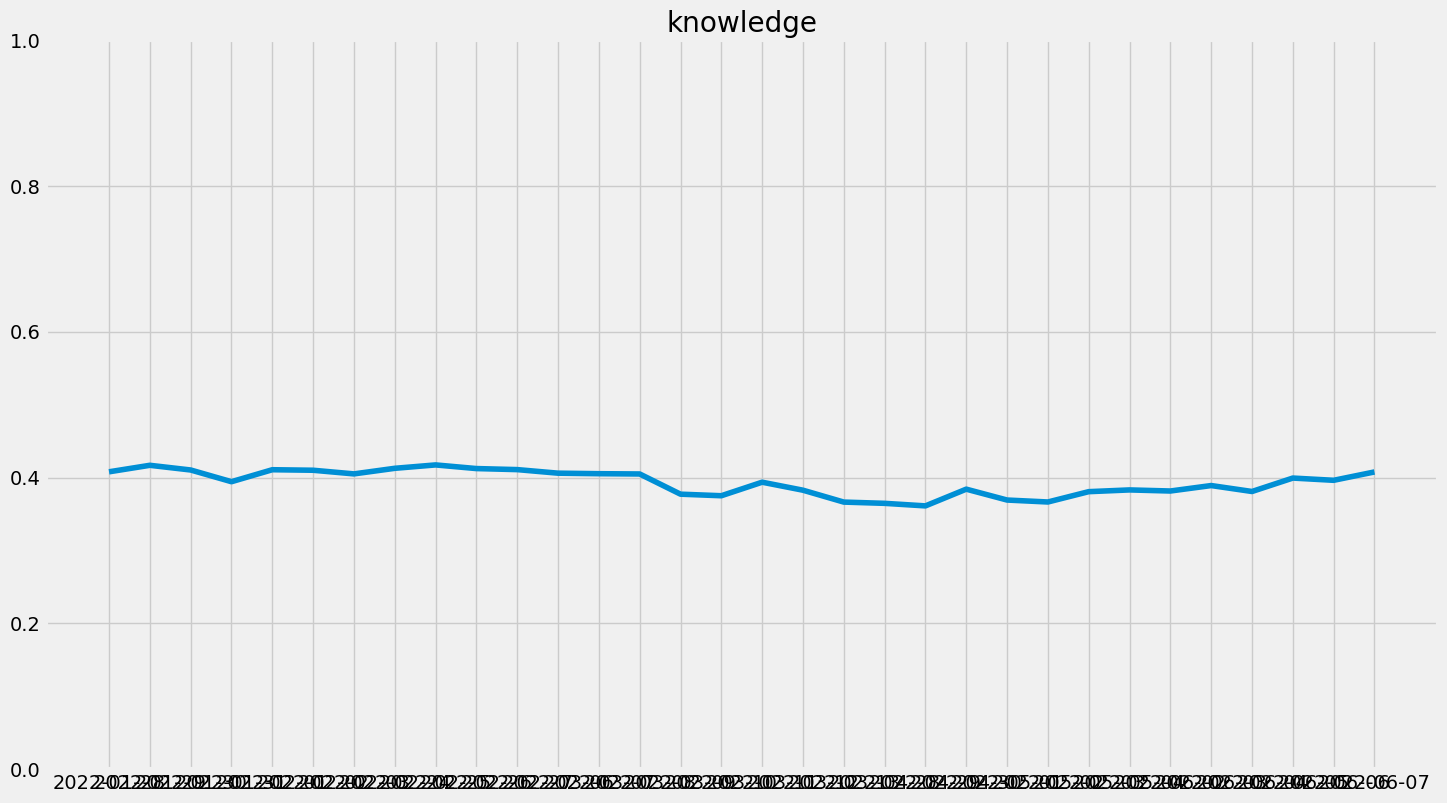

2022-12-01 09:49:20,977 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-12-01 09:49:20,983 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


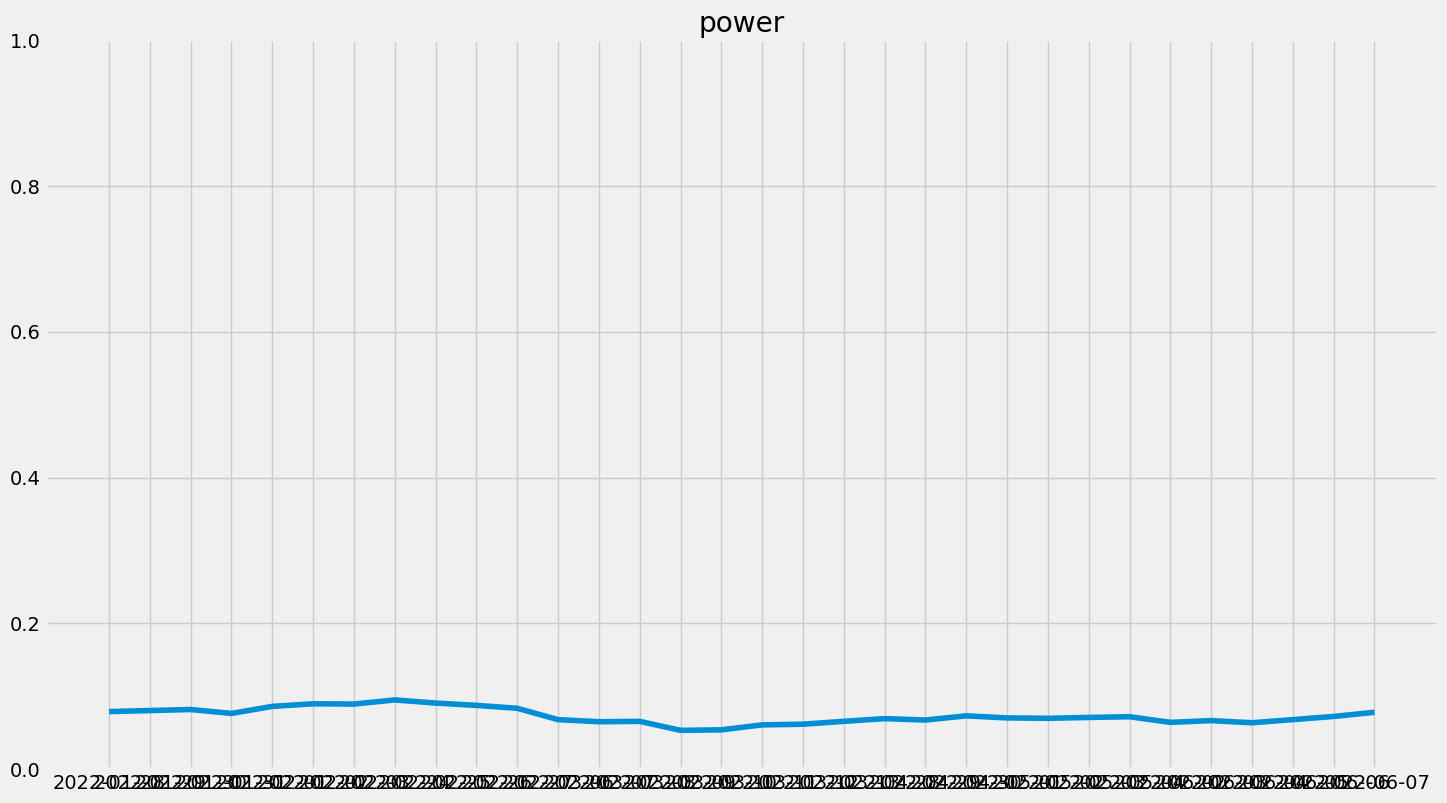

2022-12-01 09:49:21,522 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-12-01 09:49:21,526 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


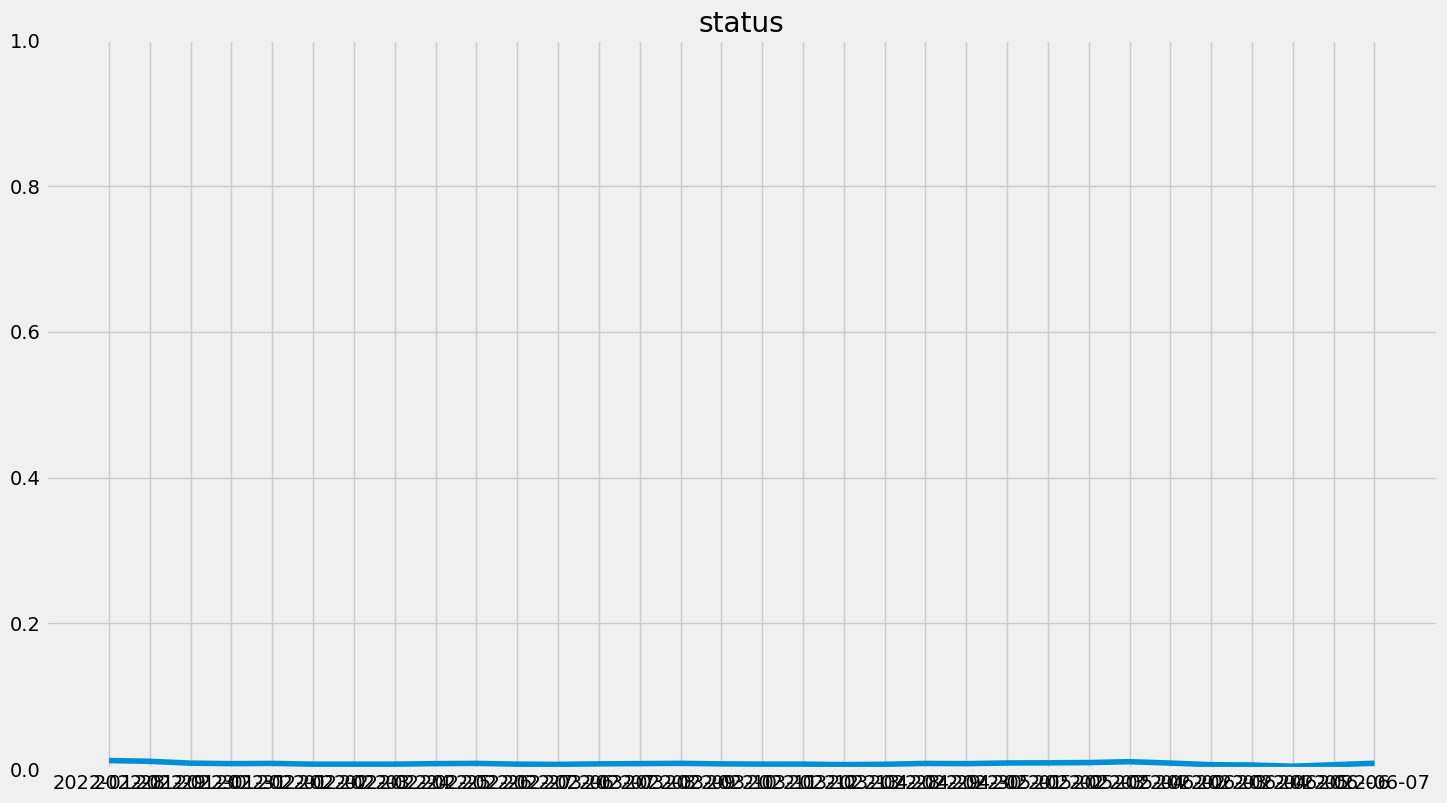

2022-12-01 09:49:21,947 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-12-01 09:49:21,952 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


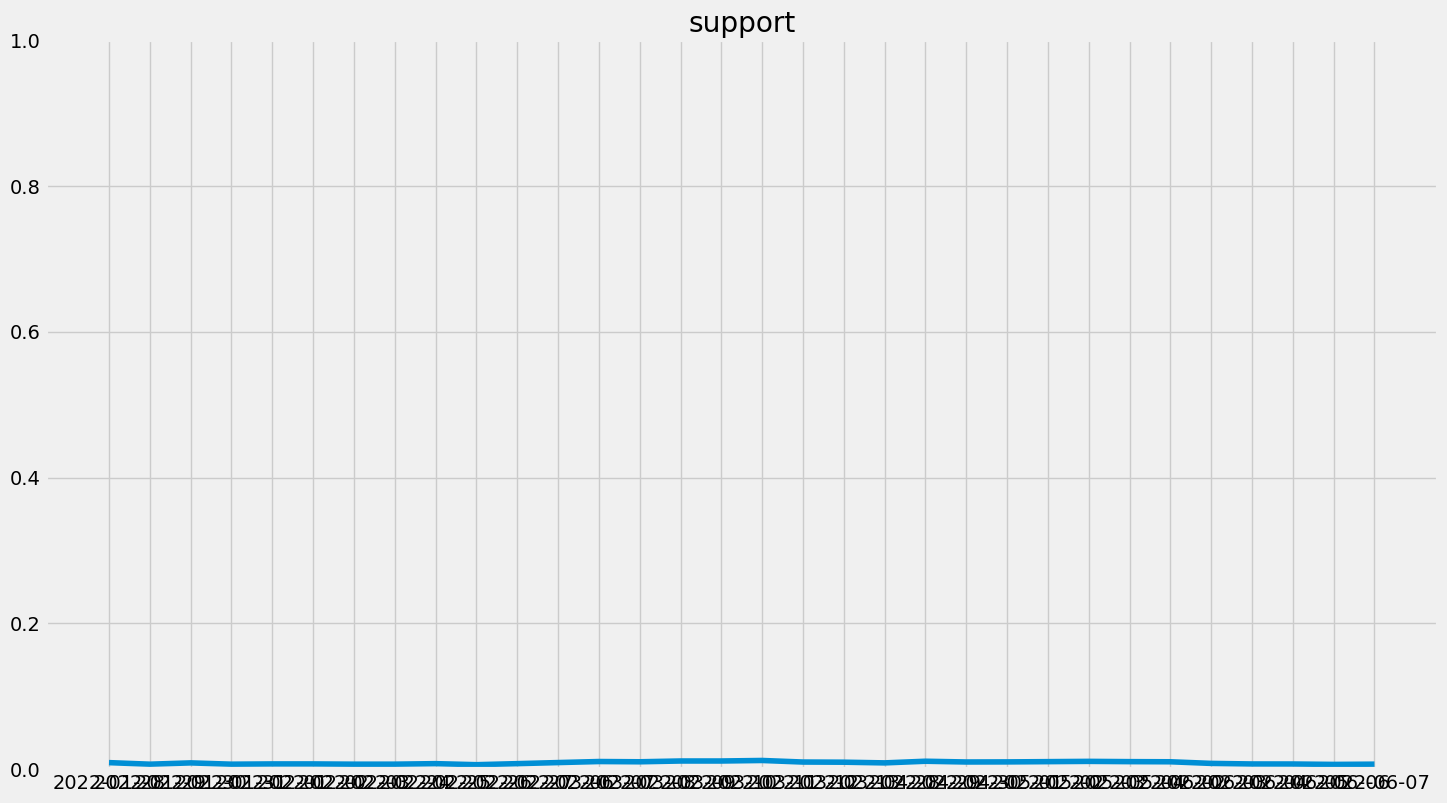

2022-12-01 09:49:22,358 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-12-01 09:49:22,363 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


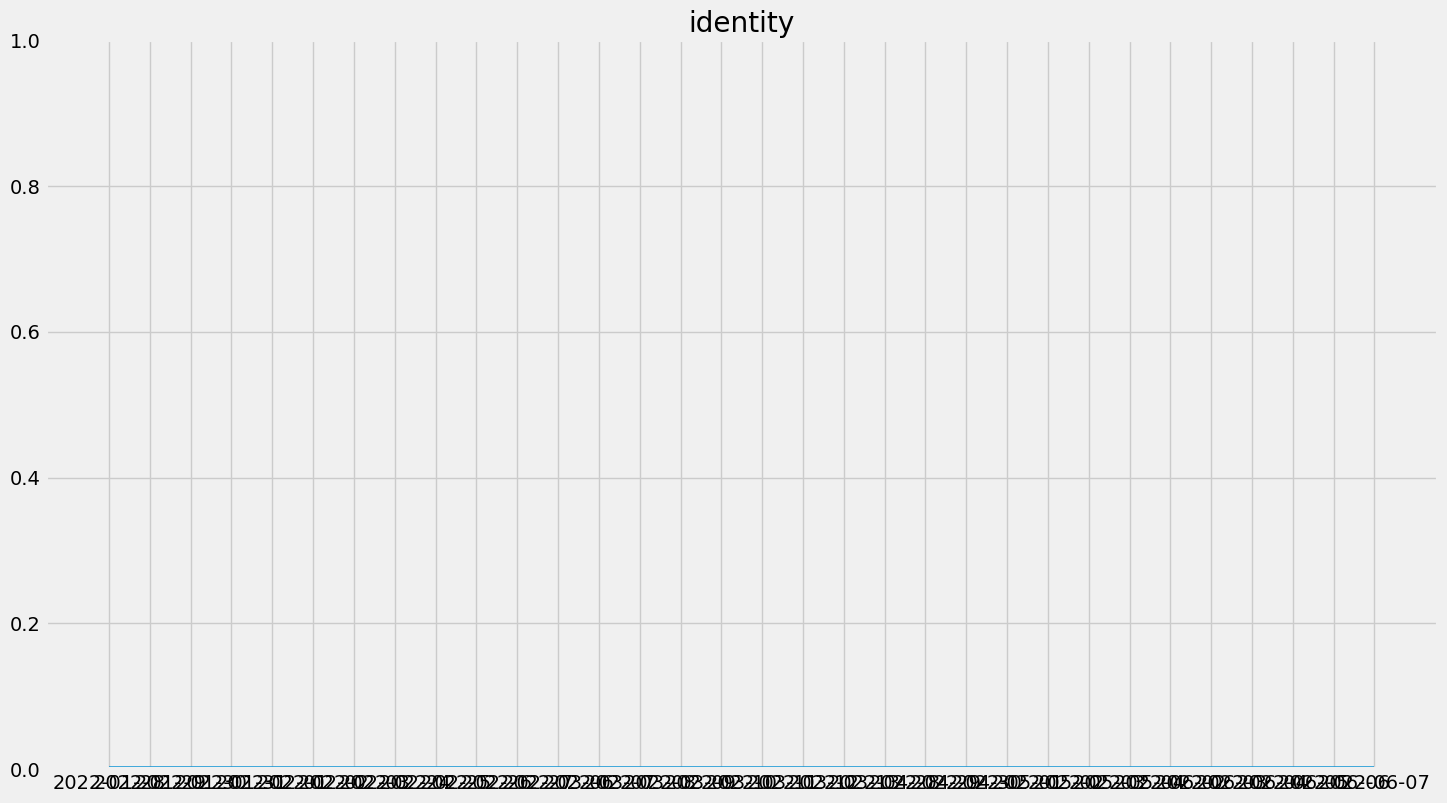

2022-12-01 09:49:22,701 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-12-01 09:49:22,706 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


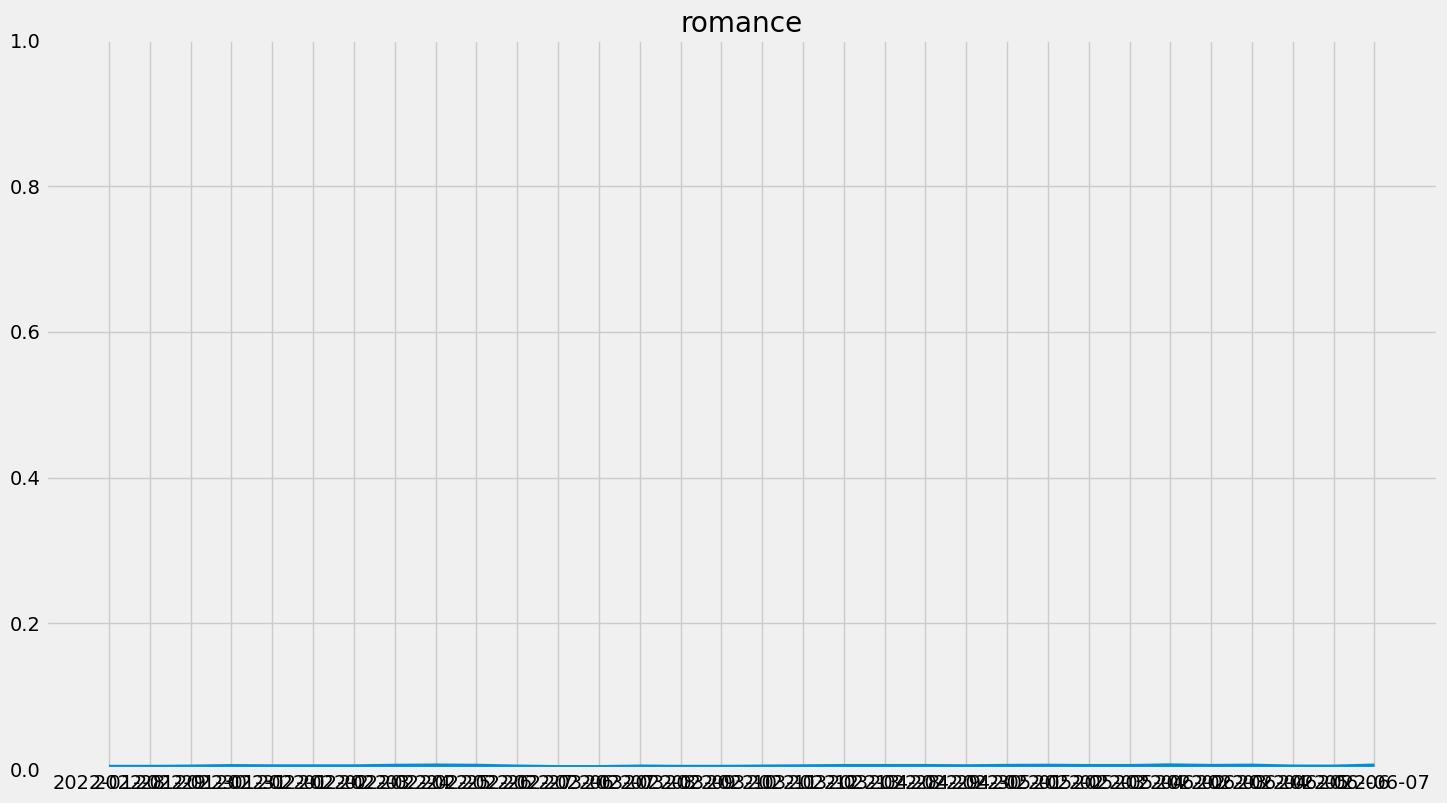

2022-12-01 09:49:23,079 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-12-01 09:49:23,085 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


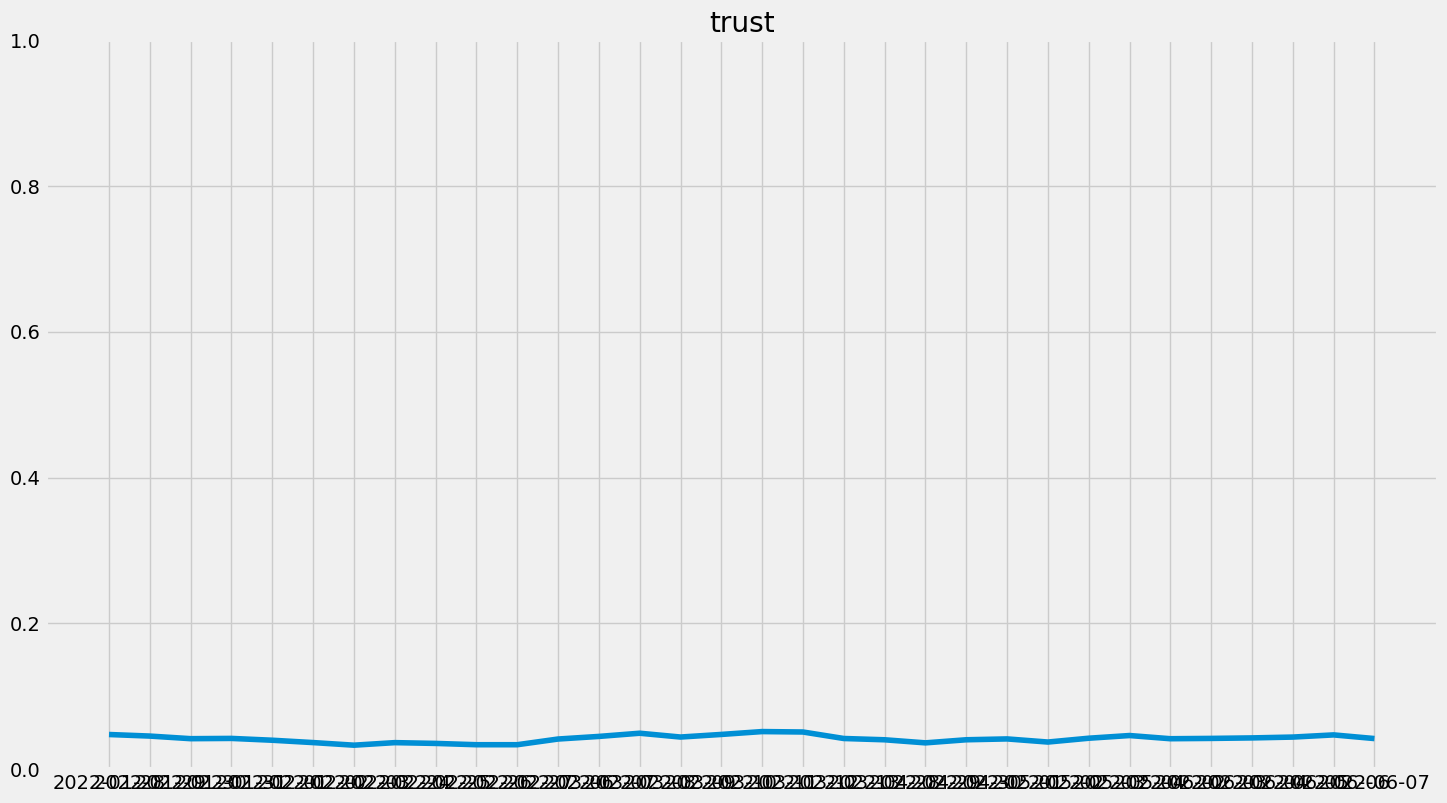

2022-12-01 09:49:23,426 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-12-01 09:49:23,432 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


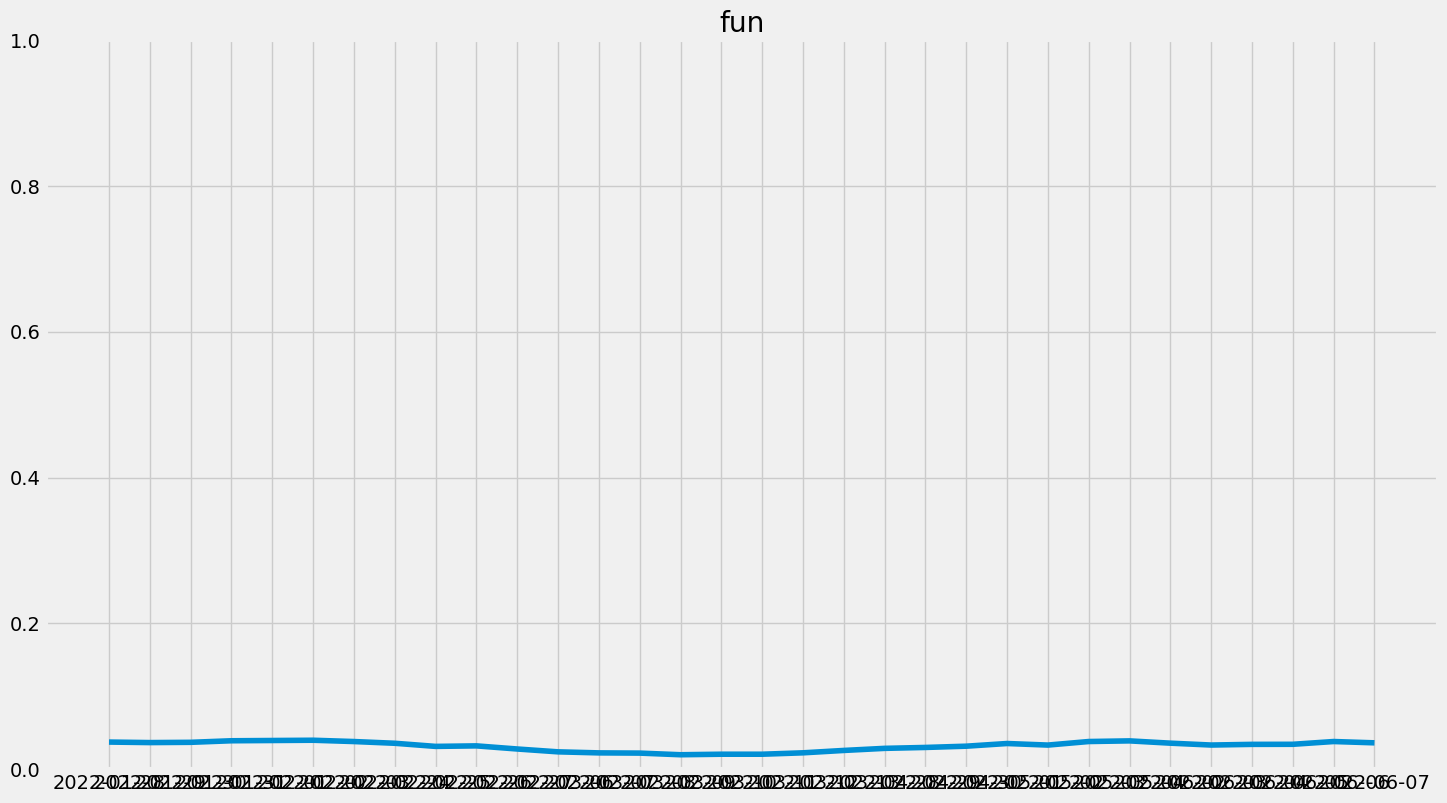

In [67]:
for dim in dims:
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=[16,9])
    plt.title(dim)
    plt.ylim([0,1])
    plt.plot(roll.index,
             roll[dim])


    plt.show()